In [ ]:
# Finds needed placements of lenses for upgraded GLINT

# Created 2023 June 9 by E.S.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# effective back focal length of a two-lens system

def ebfl(f1,f2,d):
    '''
    EBFL is the focal length of a combined two-lens system, as measured after lens 2
    
    f1: focal length of lens 1
    f2: focal length of lens 2
    d: distance between lenses
    '''
    
    return np.divide( np.multiply(f2,(d-f1)), d-f1-f2 )

In [1]:
# find f2, given other params

def find_f2(d,f1,ebfl):
    '''
    ebfl: focal length of a combined two-lens system, as measured after lens 2
    f1: focal length of lens 1
    d: distance between lenses
    '''
    
    return ebfl*(d-f1)/(d-f1+ebfl)   

In [5]:
test = ebfl(f1=50.,f2=20.,d=30.)

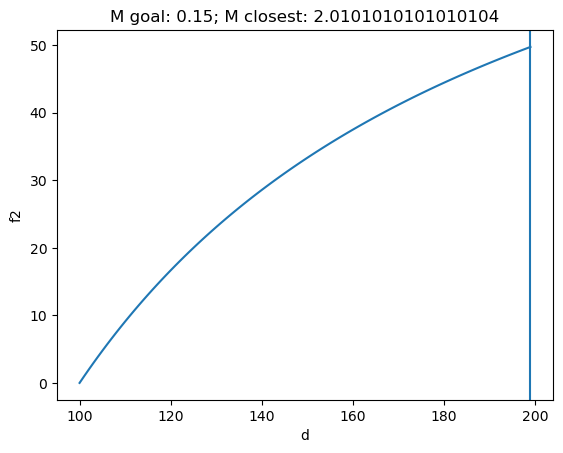

In [68]:
# find f2s, keeping in mind M=|f1/f2| 

f1_this = 100
ebfl_this = 100
M_goal = 0.15

d_range = range(100,200)

df_all = pd.DataFrame()

for d_this in range(100,200):
    
    f2_this = find_f2(d=d_this,
                 f1=f1_this,
                 ebfl=ebfl_this)
    
    try:
        M = np.abs(f1_this/f2_this)
    except:
        M = np.nan
    
    df_this = pd.DataFrame({'d':[d_this],'f1':[f1_this],'f2':[f2_this],'ebfl':[ebfl_this],'M':M})
    
    df_all = pd.concat([df_all, df_this]).reset_index(drop=True)
    
# where is mag closes to what I want?
closest_params = df_all.iloc[(df_all['M']-M_goal).abs().argsort()[:1]]
    
plt.plot(df_all['d'],df_all['f2'])
plt.axvline(x = closest_params['d'].values[0])
plt.suptitle(
plt.title('M goal: '+str(M_goal)+'; M closest: '+str(closest_params['M'].values[0]))
plt.xlabel('d')
plt.ylabel('f2')
plt.show()

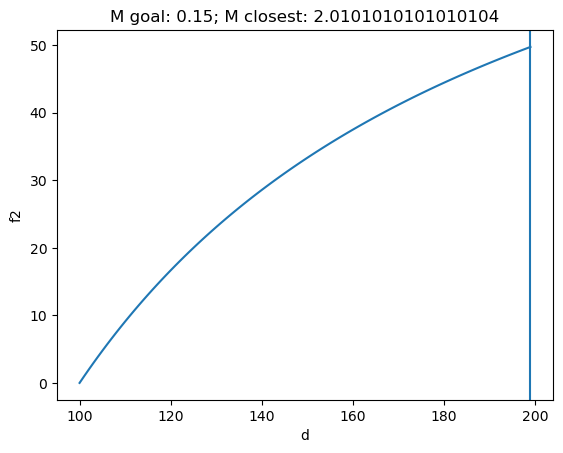

In [67]:
plt.plot(df_all['d'],df_all['f2'])
plt.axvline(x = closest_params['d'].values[0])
plt.title('M goal: '+str(M_goal)+'; M closest: '+str(closest_params['M'].values[0]))
plt.xlabel('d')
plt.ylabel('f2')
plt.show()